# CIE Standard Human Observer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h,c,k

## Read CIE Standard Human Observer rgb data (1931 and 1964)

In [2]:
data10 = pd.read_excel('cie.15.2004.tables.xls',sheet_name='Table5')
data2 = pd.read_excel('cie.15.2004.tables.xls',sheet_name='Table4')

In [3]:
wavelengths10 = data10['Table T.5. CIE 1964 standard colorimetric observer'].values[4:-1]
wavelengths2 = data10['Table T.5. CIE 1964 standard colorimetric observer'].values[4:-1]

In [4]:
R10 = data10['Unnamed: 1'].values[4:-1]
G10 = data10['Unnamed: 2'].values[4:-1]
B10 = data10['Unnamed: 3'].values[4:-1]

In [5]:
R2 = data2['Unnamed: 1'].values[4:-1]
G2 = data2['Unnamed: 2'].values[4:-1]
B2 = data2['Unnamed: 3'].values[4:-1]

## Plot sensitivity vs wavelength spectra for CIE Human Standard Observer

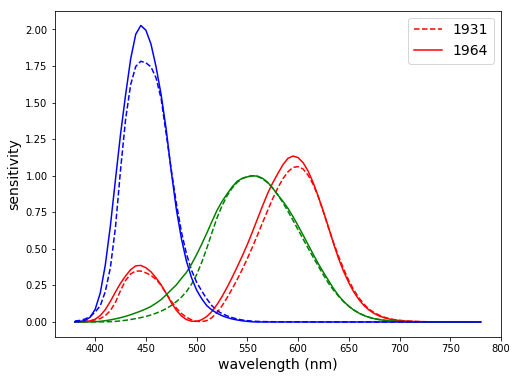

In [6]:
plt.figure(figsize=(8,6))

plt.plot(wavelengths2,R2,color='red',linestyle='--',label='1931')
plt.plot(wavelengths2,G2,color='green',linestyle='--')
plt.plot(wavelengths2,B2,color='blue',linestyle='--')
plt.xlabel('wavelength (nm)',fontsize=14)
plt.ylabel('sensitivity',fontsize=14)

plt.plot(wavelengths10,R10,color='red',label='1964')
plt.plot(wavelengths10,G10,color='green')
plt.plot(wavelengths10,B10,color='blue')
plt.xlabel('wavelength (nm)',fontsize=14)
plt.ylabel('sensitivity',fontsize=14)

plt.legend(fontsize=14)

# plt.savefig('rgb_plot.png',dpi=300,bbox_inches='tight')
plt.show()

## Calculate the XYZ Tristimulus values of the CIE Standard Human Observer

In [7]:
def XY(x_bar,y_bar,z_bar):
    I = x_bar + y_bar + z_bar

    X = x_bar/I
    Y = y_bar/I
    Z = z_bar/I

    X = np.append(X,X[0])
    Y = np.append(Y,Y[0])
    
    return X,Y

In [8]:
XY2 = XY(R2,G2,B2)
XY10 = XY(R10,G10,B10)

### Blackbody emission

In [10]:
def B(Lambda, T):
    return (2*h*(c**2))/((Lambda**5)*(np.exp((h*c)/(Lambda*k*T))-1))

### Calculate CIE-xy chromaticities for a blackbody with different temperatures

In [11]:
temps = np.arange(1000,11000,500)
locusR10 = []
locusG10 = []
locusB10 = []

locusR2 = []
locusG2 = []
locusB2 = []

for t in temps:
    P = B(np.float_(wavelengths2*1E-9),t)
    locusR10.append(np.sum(P*R10))
    locusG10.append(np.sum(P*G10))
    locusB10.append(np.sum(P*B10))
    
    locusR2.append(np.sum(P*R2))
    locusG2.append(np.sum(P*G2))
    locusB2.append(np.sum(P*B2))

In [12]:
locusXY10 = XY(np.array(locusR10),np.array(locusG10),np.array(locusB10))
locusXY2 = XY(np.array(locusR2),np.array(locusG2),np.array(locusB2))

## Overlay the calculated CIExy values over the color "tongue"

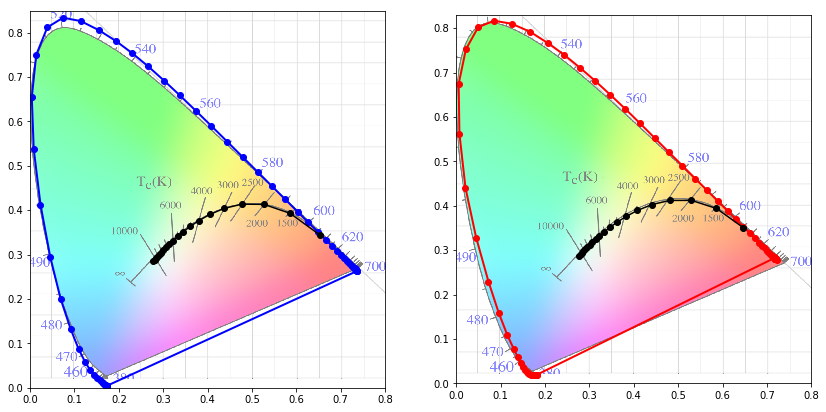

In [13]:
tongue = plt.imread('tongue.png')

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.imshow(tongue,alpha=0.5,extent=[0,0.8,0.02,0.87])
ax1.plot(XY2[0],XY2[1],color='blue',marker='o',linewidth=2)
ax1.plot(locusXY2[0][:-1],locusXY2[1][:-1],color='black',marker='o')
ax1.set_xlim(0,0.8)
ax1.set_ylim(0,0.85)

ax2.imshow(tongue,alpha=0.5,extent=[0,0.8,0.02,0.87])
ax2.plot(XY10[0],XY10[1],color='red',marker='o',linewidth=2)
ax2.plot(locusXY10[0][:-1],locusXY10[1][:-1],color='black',marker='o')
ax2.set_xlim(0,0.8)
ax2.set_ylim(0,0.83)

# plt.savefig('tongue_plot.png',dpi=300,bbox_inches='tight')

plt.show()